# Workflow **AgeAtDeath_Histogram**

## **Load**

In [1]:
# module needed to handle jsons
import json

# module needed to draw random samples
import random

# module needed to handle arrays
import numpy as np

# modules needed for graphing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('musician_age_at_death.json', 'r') as fp:
    data = json.load(fp)

In [3]:
f'The Wikipedia API returned {len(list(data.keys()))} pages (age of death).'

'The Wikipedia API returned 9727 pages (age of death).'

In [49]:
random.choice(list(data.items()))

('Yvette Guilbert', 79)

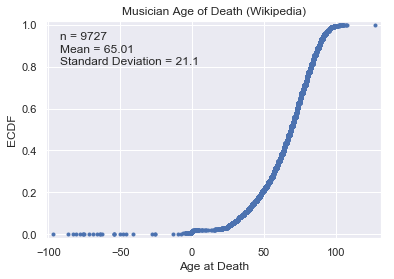

In [129]:
data_array = np.array(list(data.values()))

x, y = ecdf(data_array)

_ = plt.plot(x, y, marker = '.', linestyle = 'none')  # we want points
_ = plt.xlabel('Age at Death')
_ = plt.ylabel('ECDF')
_ = plt.text(np.min(data_array) + 5, 0.93, "n = " + str(len(data_array)))
_ = plt.text(np.min(data_array) + 5, 0.87, "Mean = " + str(round(np.mean(data_array),2)))
_ = plt.text(np.min(data_array) + 5, 0.81, "Standard Deviation = " + str(round(np.std(data_array),2)))
_ = plt.title("Musician Age of Death (Wikipedia)")

plt.margins(0.02)  # Keeps data off plot edges
plt.show()

In [99]:
# filter whose values are greater than 1
data_15less = { key:value for (key,value) in data.items() if value < 15}

In [100]:
len(list(data_15less.items())) / len(list(data.items()))

0.021383777115246222

Two percent of the dataset has a value of 15 or less.

## Filter **Greater Than 15**

In [101]:
data_15plus = {key: value for (key, value) in data.items() if value >= 15 }

In [102]:
f'The Wikipedia API returned {len(list(data_15plus.keys()))} pages (age of death).'

'The Wikipedia API returned 9519 pages (age of death).'

In [105]:
random.choice(list(data_15plus.items()))

('Steven Grossman (musician)', 39)

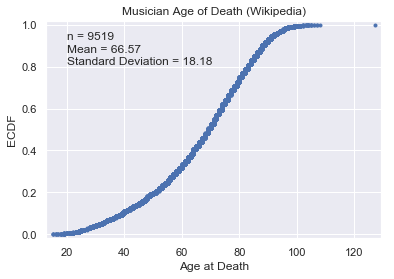

Mean: 66.57464019329761 Standard Deviation: 18.175299113395617


In [130]:
data_array = np.array(list(data_15plus.values()))

x, y = ecdf(data_array)

_ = plt.plot(x, y, marker = '.', linestyle = 'none')  # we want points

_ = plt.xlabel('Age at Death')
_ = plt.ylabel('ECDF')
_ = plt.text(np.min(data_array) + 5, 0.93, "n = " + str(len(data_array)))
_ = plt.text(np.min(data_array) + 5, 0.87, "Mean = " + str(round(np.mean(data_array),2)))
_ = plt.text(np.min(data_array) + 5, 0.81, "Standard Deviation = " + str(round(np.std(data_array),2)))
_ = plt.title("Musician Age of Death (Wikipedia)")

plt.margins(0.02)  # Keeps data off plot edges
plt.show()

print('Mean:', np.mean(data_array), 'Standard Deviation:', np.std(data_array))

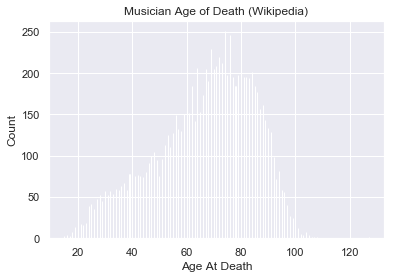

In [126]:
length = len(data_array) # number of keys in dict
n_bins = int(length)

sns.set()
_ = plt.hist(data_array, bins = n_bins)

_ = plt.xlabel('Age At Death')
_ = plt.ylabel('Count')
_ = plt.title("Musician Age of Death (Wikipedia)")

plt.show()

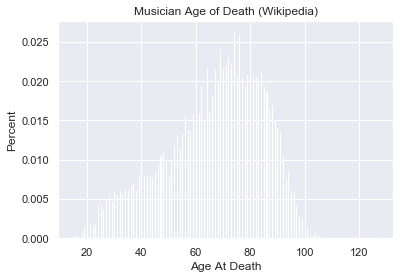

In [127]:
length = len(data_array) # number of keys in dict
n_bins = int(length)

sns.set()
_ = plt.hist(data_array, weights=np.ones(len(data_array)) / len(data_array), bins = n_bins)

_ = plt.xlabel('Age At Death')
_ = plt.ylabel('Percent')
_ = plt.title("Musician Age of Death (Wikipedia)")

plt.show()

### Dependencies

In [57]:
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements
    """
    
    # Number of data points: n
    n = len(data)
    
    # sorted values
    x = np.sort(data)
    
    # evenly spaced datapoints with the maximum of 1
    y = np.arange(1, n+1) / n
    
    return x,y